#Searching_burns



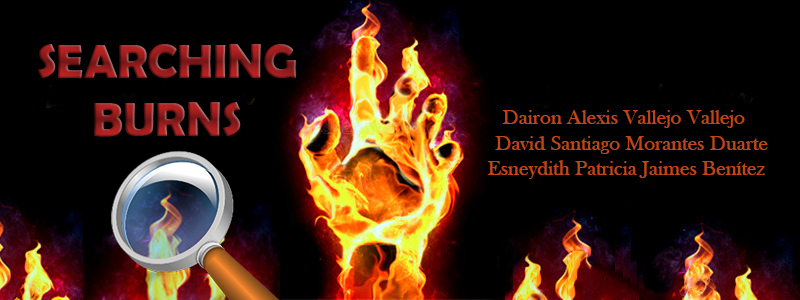



<b>Presentado por:</b><br/>
Esneydith Patricia Jaimes Benitez<br/>
Dairon Alexis Vallejop Vallejo<br/>
David Santiago Morantes Duarte<br/>
<br/>

<b>Asignatura:</b><br/>
Inteligencia Artificial I
<br/>

Ingeniería de Sistemas.<br/>
Universidad Industrial de Santander<br/>
<br/>
<b> Objetivo:</b><br/>
Desarrollar e implementar un apoyo para los especialistas medicos e incluso personas del común para identificar y clasificar los tipos de quemaduras en la piel.<br/>
<b>Nota:</b> Es un apoyo más no un reemplazo del mismo, siempre será necesario acudiar a un especialista en caso de una quemadura.

<b>Tipos de quemadura:</b><br/>
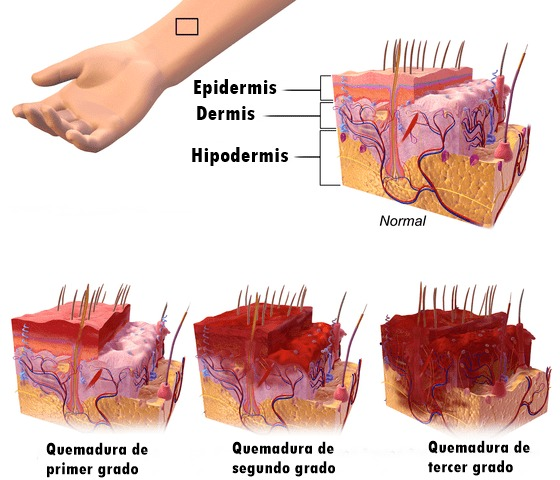

<b>Modelos: GB, DT, RF,SVC, CNN </b><br/>


<b>Datos: </b>
Cerca de 1000 imagenes de diferentes tipos de quemaduras de piel fueron usadas https://www.kaggle.com/datasets/shubhambaid/skin-burn-dataset 


#MONTAR EL  DRIVE

In [1]:
import os
from google.colab import drive
path_ai = "Proyecto IA" 
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive', force_remount=True)
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Proyecto IA


In [2]:
import os
import shutil # administración de archivos
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report, roc_auc_score
import random
from PIL import Image

#DIVIDIR LOS DATOS 

In [ ]:
tipo_1 = os.listdir("0")
train_1, test_1 = train_test_split(tipo_1, test_size=0.15)

print("Imagenes tipo 1: " + str(np.shape(tipo_1)[0]))
print("Train tipo 1: " + str(np.shape(train_1)[0]))
print("Test tipo 1: " + str(np.shape(test_1)[0]), "\n")

tipo_2 = os.listdir("1")
train_2, test_2 = train_test_split(tipo_2, test_size=0.15)

print("Imagenes tipo 2: " + str(np.shape(tipo_2)[0]))
print("Train tipo 2: " + str(np.shape(train_2)[0]))
print("Test tipo 2: " + str(np.shape(test_2)[0]), "\n")

tipo_3 = os.listdir("2")
train_3, test_3 = train_test_split(tipo_3, test_size=0.15)

print("Imagenes tipo 3: " + str(np.shape(tipo_3)[0]))
print("Train tipo 3: " + str(np.shape(train_3)[0]))
print("Test tipo 3: " + str(np.shape(test_3)[0]))

#CREAR DIRECTORIOS DE ENTRENAMIENTO Y TEST PARA CADA CLASE

In [ ]:
base_dir = "split_1"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, "Train")
os.mkdir(train_dir)

test_dir = os.path.join(base_dir, "Test")
os.mkdir(test_dir)

labels = ["1","2","3"]

for label in labels:
    label_path_train = os.path.join(train_dir, label)
    os.mkdir(label_path_train)
    label_path_test = os.path.join(test_dir, label)
    os.mkdir(label_path_test)

In [4]:
base_dir = "datos_2"
os.mkdir(base_dir)

tipo_1_dir = os.path.join(base_dir, "tipo_1_1")
os.mkdir(tipo_1_dir)

tipo_2_dir = os.path.join(base_dir, "tipo_2_2")
os.mkdir(tipo_2_dir)

tipo_3_dir = os.path.join(base_dir, "tipo_3_3")
os.mkdir(tipo_3_dir)

#GUARDAR DATOS DENTRO DE LAS CARPETAS DE TRAIN Y TEST

In [ ]:
image_dir = ""

for i in train_1:
    src_dir = os.path.join(image_dir,"0", str(i))
    dst_dir = os.path.join(train_dir, "1", str(i))
    shutil.copyfile(src_dir, dst_dir)

for i in train_2:
    src_dir = os.path.join(image_dir,"1",str(i))
    dst_dir = os.path.join(train_dir, "2", str(i))
    shutil.copyfile(src_dir, dst_dir)

for i in train_3:
    src_dir = os.path.join(image_dir,"2", str(i))
    dst_dir = os.path.join(train_dir, "3", str(i))
    shutil.copyfile(src_dir, dst_dir)
    
for i in test_1:
    src_dir = os.path.join(image_dir,"0", str(i))
    dst_dir = os.path.join(test_dir, "1", str(i))
    shutil.copyfile(src_dir, dst_dir)

for i in test_2:
    src_dir = os.path.join(image_dir,"1", str(i))
    dst_dir = os.path.join(test_dir, "2", str(i))
    shutil.copyfile(src_dir, dst_dir)

for i in test_3:
    src_dir = os.path.join(image_dir,"2", str(i))
    dst_dir = os.path.join(test_dir, "3", str(i))
    shutil.copyfile(src_dir, dst_dir)

#COMPROBAR QUE LOS DATOS SE GUARDARON CORRECTAMENTE

In [ ]:
train_1 = np.shape(os.listdir("split/Train/1"))[0]
train_2 = np.shape(os.listdir("split/Train/2"))[0]
train_3 = np.shape(os.listdir("split/Train/3"))[0]
train_total = train_1 + train_2 + train_3

test_1 = np.shape(os.listdir("split/Test/1"))[0]
test_2 = np.shape(os.listdir("split/Test/2"))[0]
test_3 = np.shape(os.listdir("split/Test/3"))[0]
test_total = test_1 + test_2 + test_3

print("Total train tipo 1 images: " + str(train_1))
print("Total train tipo 2 images: " + str(train_2))
print("Total train tipo 3 images: " + str(train_3))
print("")
print("Total test tipo 1 images: " + str(test_1))
print("Total test tipo 2 images: " + str(test_2))
print("Total test tipo 3 images: " + str(test_3))
print("")
print("Total train images: " + str(train_total))
print("Total test images: " + str(test_total))
print("")
print("Total images: " + str(train_total + test_total))

In [5]:
from PIL import Image
from itertools import product

def tile(filename, dir_in, dir_out, d):
    name, ext = os.path.splitext(filename)
    img = Image.open(os.path.join(dir_in, filename))
    w, h = img.size
    
    grid = product(range(0, h-h%d, d), range(0, w-w%d, d))
    for i, j in grid:
        box = (j, i, j+d, i+d)
        out = os.path.join(dir_out, f'{name}_{i}_{j}{ext}')
        img.crop(box).save(out)



In [8]:

import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import cv2


flat_data_arr=[]   
target_arr=[]   

datadir='' 
datadir_1='datos_2'

path=os.path.join(datadir,'tipo_1')
path_1=os.path.join(datadir_1,'tipo_1_1')

path_2=os.path.join(datadir,'tipo_2')
path_3=os.path.join(datadir_1,'tipo_2_2')

path_4=os.path.join(datadir,'tipo_3')
path_5=os.path.join(datadir_1,'tipo_3_3')
  
for img in os.listdir(path):
  tile(img, path, path_1, 128)
  img_array=imread(os.path.join(path,img),)
  img_resized=resize(img_array,(256,256,3))
  flat_data_arr.append(img_resized.flatten())
  target_arr.append(0)

for img_1 in os.listdir(path_2):
  tile(img_1, path_2, path_3, 128)
  img_array=imread(os.path.join(path_2,img_1),)
  img_resized=resize(img_array,(256,256,3))
  flat_data_arr.append(img_resized.flatten())
  target_arr.append(1)

for img_2 in os.listdir(path_4):
  tile(img_2, path_4, path_5, 128)
  img_array=imread(os.path.join(path_4,img_2),)
  img_resized=resize(img_array,(256,256,3))
  flat_data_arr.append(img_resized.flatten())
  target_arr.append(2)


In [9]:
df=pd.DataFrame(flat_data_arr) 
df['Target']=target_arr
x=df.iloc[:,:-1] 
y=df.iloc[:,-1] 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=21,stratify=y)

#Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

est_gaussian = GaussianNB()

est_gaussian.fit(x_train,y_train)
predictions = est_gaussian.predict(x_test)

#KFOLDS MAS OPTIMOS

In [ ]:
from sklearn.model_selection import KFold
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,12)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, x_test, y_test, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

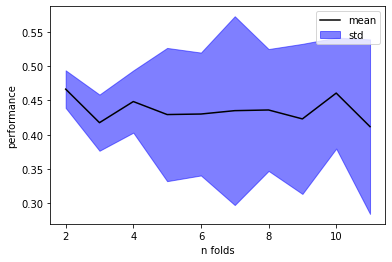

In [ ]:
from sklearn.model_selection import cross_val_score
show_curve(GaussianNB()) 

In [ ]:
from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

test_acc = cross_val_score(est_gaussian, x_test, y_test, cv=KFold(2, shuffle=True), scoring=make_scorer(accuracy_score))
test_precision_score = cross_val_score(est_gaussian, x_test, y_test, cv=KFold(2, shuffle=True), scoring=make_scorer(precision_score, average="weighted"))
test_f1_score = cross_val_score(est_gaussian, x_test, y_test, cv=KFold(2, shuffle=True), scoring=make_scorer(f1_score, average="weighted"))
test_recall_score = cross_val_score(est_gaussian, x_test, y_test, cv=KFold(2, shuffle=True), scoring=make_scorer(recall_score, average="weighted"))

print ("Test accuracy: %.4f (+/- %.5f)"%(np.mean(test_acc), np.std(test_acc)))
print ("Test precision: %.4f (+/- %.5f)"%(np.mean(test_precision_score), np.std(test_precision_score)))
print ("Test F1 score: %.4f (+/- %.5f)"%(np.mean(test_f1_score), np.std(test_f1_score)))
print ("Test Recall score: %.4f (+/- %.5f)"%(np.mean(test_recall_score), np.std(test_recall_score)))

Test accuracy: 0.3127 (+/- 0.02876)
Test precision: 0.4485 (+/- 0.00536)
Test F1 score: 0.3215 (+/- 0.06165)
Test Recall score: 0.3744 (+/- 0.02070)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


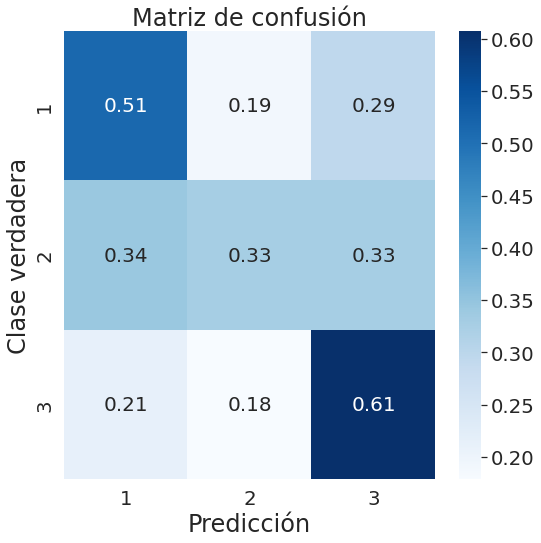

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

predictions = est_gaussian.predict(x_test)
labels = ['1', '2', '3']
conf_mat = confusion_matrix(y_test, predictions)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1, keepdims=True)


df_cm = pd.DataFrame(conf_mat, range(1,4), range(1,4))
plt.figure(figsize=(8,8))
sn.set(font_scale=1.8)
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 20})

plt.ylabel('Clase verdadera',fontsize=24)
plt.xlabel('Predicción',fontsize=24)
plt.title('Matriz de confusión',fontsize=24)
plt.tight_layout()

plt.show()                                             

#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
est_dtc = DecisionTreeClassifier()
est_dtc.fit(x_train,y_train)

DecisionTreeClassifier()

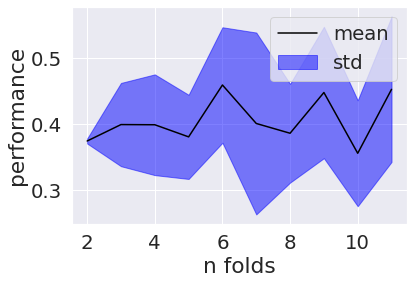

In [ ]:
show_curve(DecisionTreeClassifier()) 

In [ ]:
test_acc = cross_val_score(est_dtc, x_test, y_test, cv=KFold(6, shuffle=True), scoring=make_scorer(accuracy_score))
test_precision_score = cross_val_score(est_dtc, x_test, y_test, cv=KFold(6, shuffle=True), scoring=make_scorer(precision_score, average="weighted"))
test_f1_score = cross_val_score(est_dtc, x_test, y_test, cv=KFold(6, shuffle=True), scoring=make_scorer(f1_score, average="weighted"))
test_recall_score = cross_val_score(est_dtc, x_test, y_test, cv=KFold(6, shuffle=True), scoring=make_scorer(recall_score, average="weighted"))

print ("Test accuracy: %.4f (+/- %.5f)"%(np.mean(test_acc), np.std(test_acc)))
print ("Test precision: %.4f (+/- %.5f)"%(np.mean(test_precision_score), np.std(test_precision_score)))
print ("Test F1 score: %.4f (+/- %.5f)"%(np.mean(test_f1_score), np.std(test_f1_score)))
print ("Test Recall score: %.4f (+/- %.5f)"%(np.mean(test_recall_score), np.std(test_recall_score)))

Test accuracy: 0.4605 (+/- 0.12723)
Test precision: 0.4850 (+/- 0.09911)
Test F1 score: 0.4017 (+/- 0.07077)
Test Recall score: 0.3311 (+/- 0.11653)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


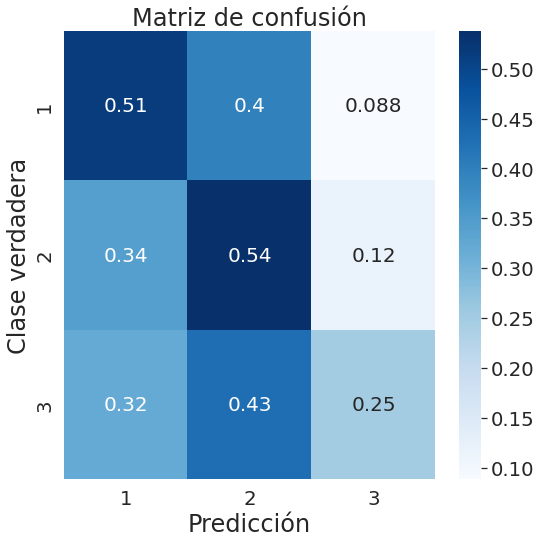

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

predictions = est_dtc.predict(x_test)
labels = ['1', '2', '3']
conf_mat = confusion_matrix(y_test, predictions)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1, keepdims=True)


df_cm = pd.DataFrame(conf_mat, range(1,4), range(1,4))
plt.figure(figsize=(8,8))
sn.set(font_scale=1.8)
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 20})

plt.ylabel('Clase verdadera',fontsize=24)
plt.xlabel('Predicción',fontsize=24)
plt.title('Matriz de confusión',fontsize=24)
plt.tight_layout()

plt.show()

#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

est_rf = RandomForestClassifier()
est_rf.fit(x_train,y_train)

RandomForestClassifier()

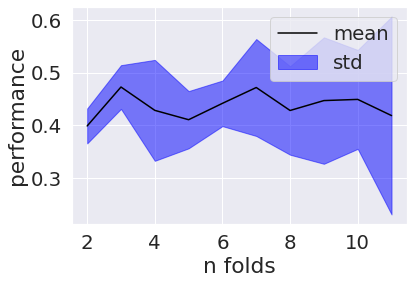

In [ ]:
show_curve(RandomForestClassifier()) 

In [ ]:


test_acc = cross_val_score(est_rf, x_test, y_test, cv=KFold(3, shuffle=True), scoring=make_scorer(accuracy_score))
test_precision_score = cross_val_score(est_rf, x_test, y_test, cv=KFold(3, shuffle=True), scoring=make_scorer(precision_score, average="weighted"))
test_f1_score = cross_val_score(est_rf, x_test, y_test, cv=KFold(3, shuffle=True), scoring=make_scorer(f1_score, average="weighted"))
test_recall_score = cross_val_score(est_rf, x_test, y_test, cv=KFold(3, shuffle=True), scoring=make_scorer(recall_score, average="weighted"))

print ("Test accuracy: %.4f (+/- %.5f)"%(np.mean(test_acc), np.std(test_acc)))
print ("Test precision: %.4f (+/- %.5f)"%(np.mean(test_precision_score), np.std(test_precision_score)))
print ("Test F1 score: %.4f (+/- %.5f)"%(np.mean(test_f1_score), np.std(test_f1_score)))
print ("Test Recall score: %.4f (+/- %.5f)"%(np.mean(test_recall_score), np.std(test_recall_score)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test accuracy: 0.3864 (+/- 0.03900)
Test precision: 0.4513 (+/- 0.04727)
Test F1 score: 0.3986 (+/- 0.02503)
Test Recall score: 0.3740 (+/- 0.03473)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


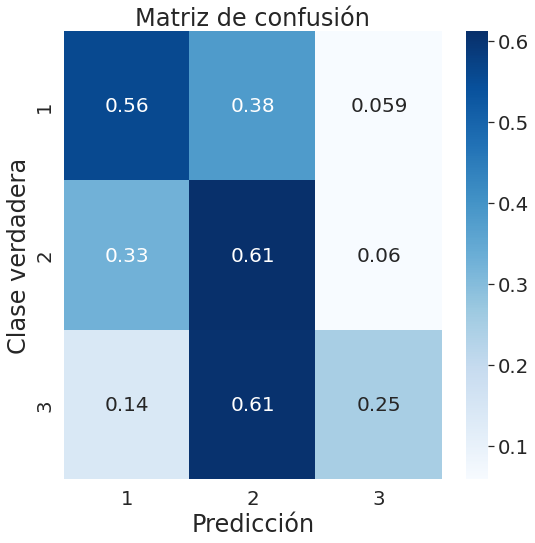

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

predictions = est_rf.predict(x_test)
labels = ['1', '2', '3']
conf_mat = confusion_matrix(y_test, predictions)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1, keepdims=True)


df_cm = pd.DataFrame(conf_mat, range(1,4), range(1,4))
plt.figure(figsize=(8,8))
sn.set(font_scale=1.8)
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 20})

plt.ylabel('Clase verdadera',fontsize=24)
plt.xlabel('Predicción',fontsize=24)
plt.title('Matriz de confusión',fontsize=24)
plt.tight_layout()

plt.show()

#Support Vector Machine

In [ ]:
from sklearn.svm import SVC

est_svc = SVC()
est_svc.fit(x_train,y_train)

SVC()

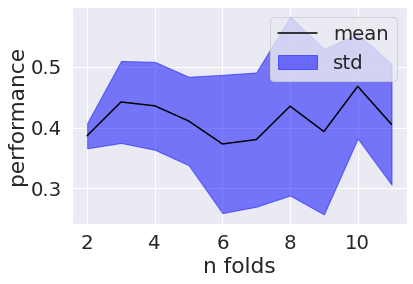

In [ ]:
show_curve(SVC()) 

In [ ]:
test_acc = cross_val_score(est_svc, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
test_precision_score = cross_val_score(est_svc, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(precision_score, average="weighted"))
test_f1_score = cross_val_score(est_svc, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(f1_score, average="weighted"))
test_recall_score = cross_val_score(est_svc, x_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(recall_score, average="weighted"))

print ("Test accuracy: %.4f (+/- %.5f)"%(np.mean(test_acc), np.std(test_acc)))
print ("Test precision: %.4f (+/- %.5f)"%(np.mean(test_precision_score), np.std(test_precision_score)))
print ("Test F1 score: %.4f (+/- %.5f)"%(np.mean(test_f1_score), np.std(test_f1_score)))
print ("Test Recall score: %.4f (+/- %.5f)"%(np.mean(test_recall_score), np.std(test_recall_score)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

Test accuracy: 0.4158 (+/- 0.12970)
Test precision: 0.4335 (+/- 0.17765)
Test F1 score: 0.3817 (+/- 0.07640)
Test Recall score: 0.4062 (+/- 0.12495)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


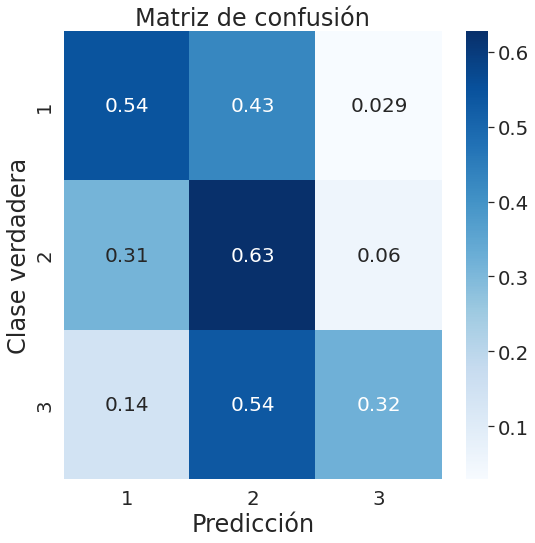

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

predictions = est_svc.predict(x_test)
labels = ['1', '2', '3']
conf_mat = confusion_matrix(y_test, predictions)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1, keepdims=True)


df_cm = pd.DataFrame(conf_mat, range(1,4), range(1,4))
plt.figure(figsize=(8,8))
sn.set(font_scale=1.8)
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 20})

plt.ylabel('Clase verdadera',fontsize=24)
plt.xlabel('Predicción',fontsize=24)
plt.title('Matriz de confusión',fontsize=24)
plt.tight_layout()

plt.show()

In [12]:
x_train = x_train.values.reshape([-1, 256, 256, 3])
x_test = x_test.values.reshape([-1, 256, 256, 3])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=3)
print(y_train_ohe.shape, y_test_ohe.shape)

x_train shape: (159, 256, 256, 3)
Number of images in x_train 159
Number of images in x_test 29
(159, 3) (29, 3)


In [13]:
model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(input_shape=(256,256,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))



model_cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(units=4096,activation="relu"))
model_cnn.add(tf.keras.layers.Dense(units=4096,activation="relu"))
model_cnn.add(tf.keras.layers.Dense(units=3, activation="softmax"))

In [21]:
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_cnn.fit(x_train, y_train_ohe,epochs=5)

Epoch 1/5
5/5 [==============================] - 4s 565ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/5
5/5 [==============================] - 3s 570ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
5/5 [==============================] - 3s 571ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
5/5 [==============================] - 3s 578ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
5/5 [==============================] - 3s 575ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [15]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                    

In [17]:
test_loss, test_acc = model_cnn.evaluate(x_test, y_test_ohe)

print('Test accuracy:', test_acc)

1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 1.0
